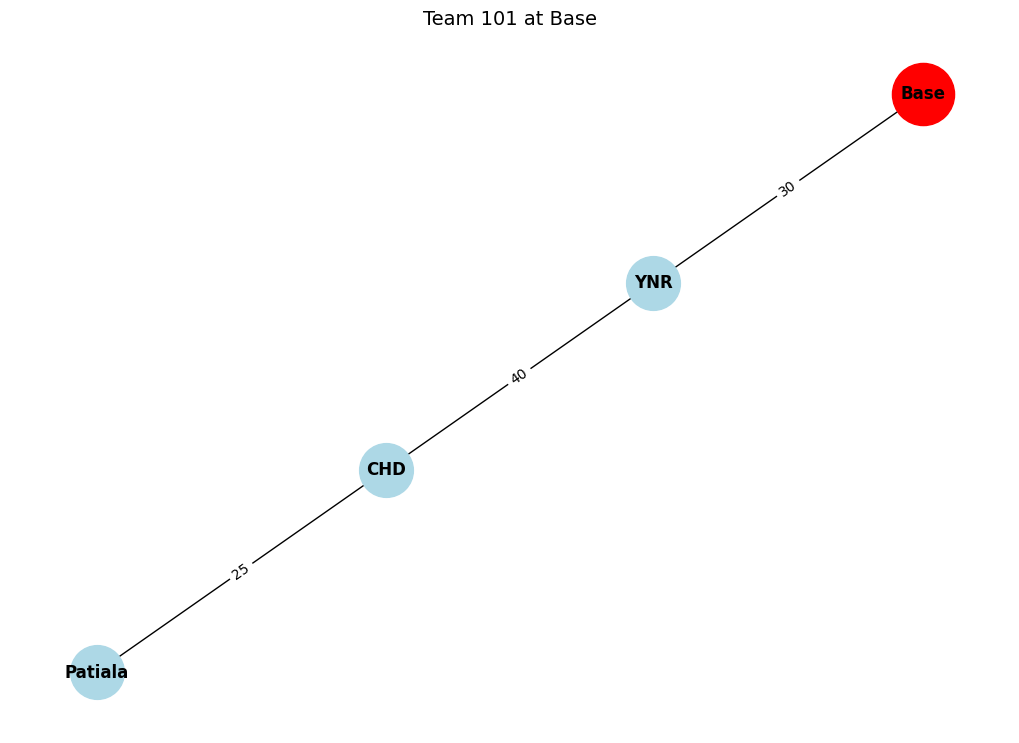

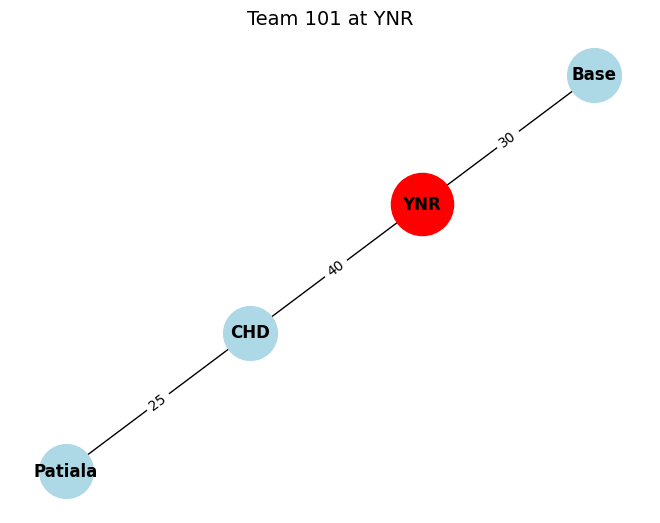

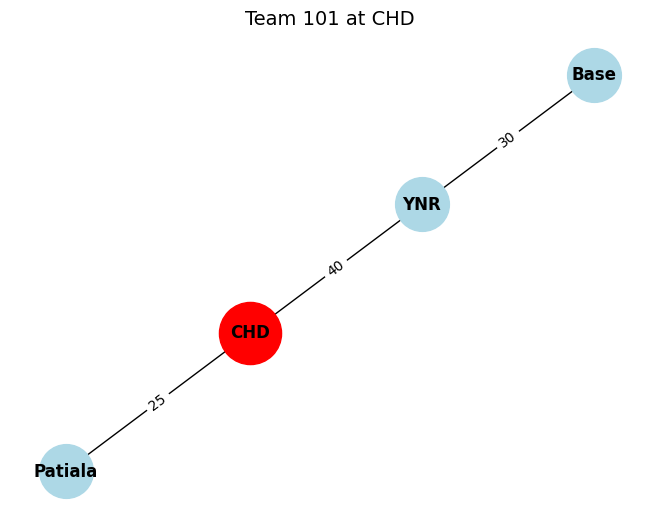

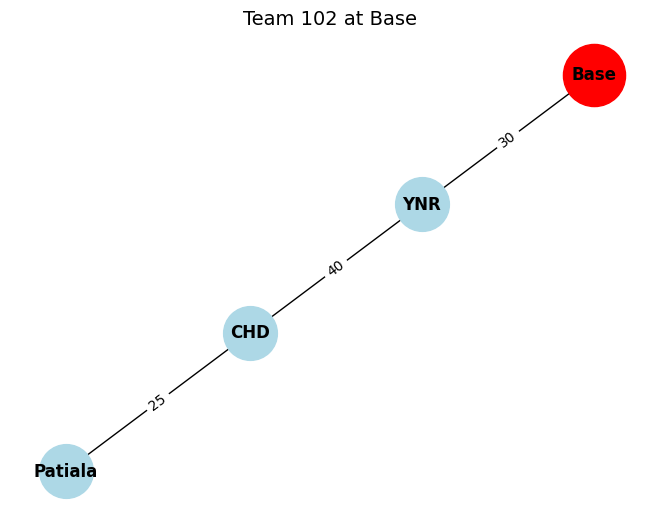

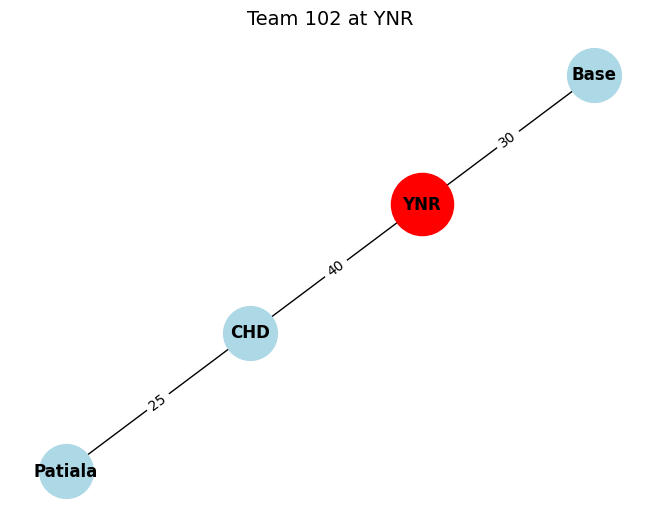

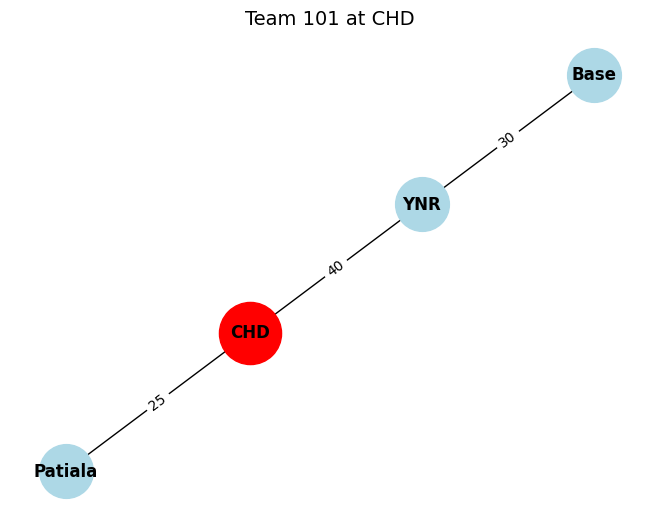

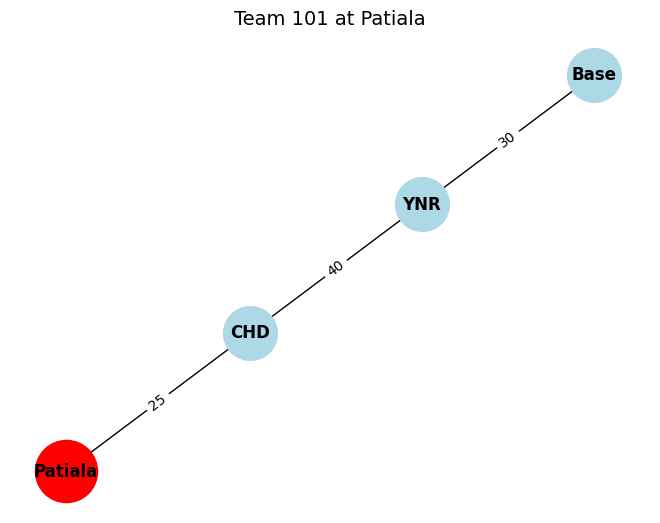

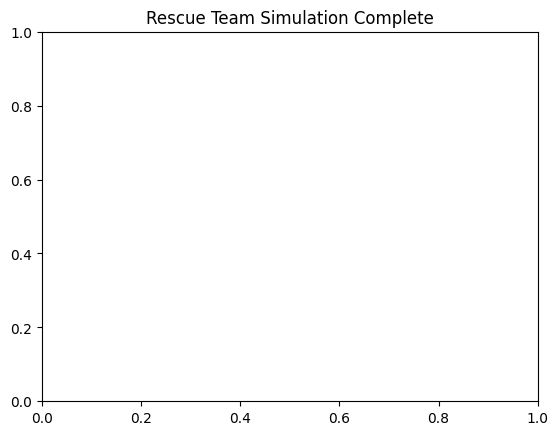

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import time



zones = ['Base', 'YNR', 'CHD', 'Patiala']
edges = [
    ('Base', 'YNR', 30),
    ('YNR', 'CHD', 40),
    ('CHD', 'Patiala', 25)
]


G = nx.Graph()
G.add_nodes_from(zones)
for u, v, d in edges:
    G.add_edge(u, v, weight=d)



team_movements = [
    ('Team 101', ['Base', 'YNR', 'CHD']),
    ('Team 102', ['Base', 'YNR']),
    ('Team 101', ['CHD', 'Patiala'])
]



pos = nx.spring_layout(G, seed=42)

def draw_network(current_pos=None, team=None):
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    if current_pos and team:
        nx.draw_networkx_nodes(G, pos, nodelist=[current_pos], node_color='red', node_size=2000)
        plt.title(f'{team} at {current_pos}', fontsize=14)

    plt.pause(1)



plt.figure(figsize=(10, 7))

for team, path in team_movements:
    for location in path:
        draw_network(current_pos=location, team=team)
        time.sleep(1)

plt.title("Rescue Team Simulation Complete")
plt.show()
